# Chapter 4: Testing and regularization with Turi Create

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Defining our dataset

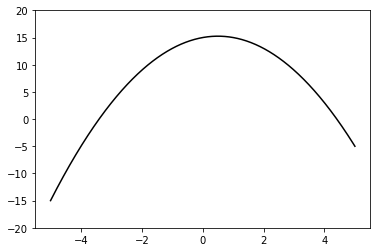

In [17]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [21]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)

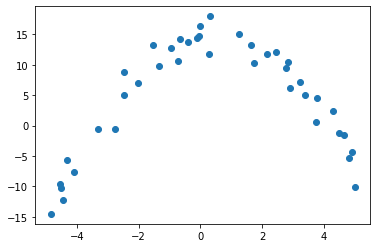

In [57]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [23]:
import turicreate as tc

In [24]:
data = tc.SFrame({'x':X, 'y':Y})
data

x,y
3.7501170424688706,0.5142590591833018
-3.3334831811078356,-0.5708438864224121
1.72170177736551,10.30054781500469
-0.9531911842926375,12.694652811314945
2.888484772730572,6.189391168659212
0.269778226736042,11.723843962509266
-1.5345992757120142,13.18850940070735
0.32334304186691654,17.973373165878343
2.762245584628423,9.505650870466836
1.2405451356517787,14.998417890973984


### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [25]:
for i in range(2,200):
    string = 'x'+str(i)
    data[string] = data['x'].apply(lambda x:x**i)
data

x,y,x2,x3,x4
3.7501170424688706,0.5142590591833018,14.063377832215469,52.73931288327015,197.77859605164946
-3.3334831811078356,-0.5708438864224121,11.112110118728815,-37.0420321874007,123.47899129075532
1.72170177736551,10.30054781500469,2.9642570101835566,5.103566563001202,8.786819622422358
-0.9531911842926375,12.694652811314945,0.9085734338132008,-0.8660441873932332,0.8255056846311108
2.888484772730572,6.189391168659212,8.343344282296384,24.09962291306179,69.61139381292777
0.269778226736042,11.723843962509266,0.07278029162084329,0.01963453801480312,0.005296970848414993
-1.5345992757120142,13.18850940070735,2.3549949370158383,-3.6139735246499662,5.5460011533702325
0.32334304186691654,17.973373165878343,0.10455072272375054,0.03380574871488205,0.010930853622058567
2.762245584628423,9.505650870466836,7.630000669799219,21.075935660864804,58.21691022113653
1.2405451356517787,14.998417890973984,1.53895223358929,1.9091397073796337,2.3683739772694645


## Splitting data into training and testing

In [26]:
train, test = data.random_split(.8, seed=0)

In [53]:
def display_results(model):
    coefs = model.coefficients
    print("Training error (rmse):", model.evaluate(train)['rmse'])
    print("Testing error (rmse):", model.evaluate(test)['rmse'])
    plt.scatter(train['x'], train['y'], marker='o')
    plt.scatter(test['x'], test['y'], marker='^')
    draw_polynomial(coefs['value'])
    plt.show()
    print("Polynomial coefficients")
    print(coefs['name', 'value'])

## Training a polynomial regression model with no regularization

In [58]:
model_no_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.0, l2_penalty=0.0, verbose=False, validation_set=None)

Training error (rmse): 1.1487881559575286
Testing error (rmse): 688412.9607676268


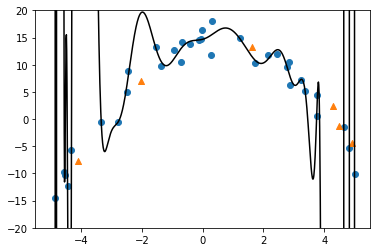

Polynomial coefficients
+-------------+---------------------+
|     name    |        value        |
+-------------+---------------------+
| (intercept) |  14.672982121468522 |
|      x      |  1.5176071368270838 |
|      x2     |  4.420892770560031  |
|      x3     |  3.0839548858614005 |
|      x4     | -11.342815484003218 |
|      x5     | -1.2731283772338369 |
|      x6     |  7.6146014386028575 |
|      x7     | -1.0143713034031723 |
|      x8     | -2.2684594223170262 |
|      x9     |  0.5579511147223617 |
+-------------+---------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [59]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [29]:
model_L1_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.1, l2_penalty=0.0, verbose=False, validation_set=None)

Training error (rmse): 9.274540439590037
Testing error (rmse): 6.291501464614775


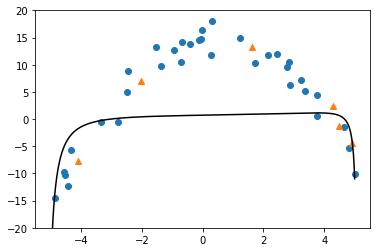

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |   0.7168050576146383   |
|      x      |  0.10406574042078935   |
|      x2     | -0.005343102579361412  |
|      x3     |  0.005258844569468133  |
|      x4     | -0.0008680032800731876 |
|      x5     | 0.00020280450655880147 |
|      x6     | -4.642917507423637e-05 |
|      x7     | 7.708965804923491e-06  |
|      x8     | -2.072858570710277e-06 |
|      x9     | 2.9303709129319274e-07 |
+-------------+------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [55]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [31]:
model_L2_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.0, l2_penalty=0.1, verbose=False, validation_set=None)

Training error (rmse): 1.8110482927686442
Testing error (rmse): 3.578622146769734


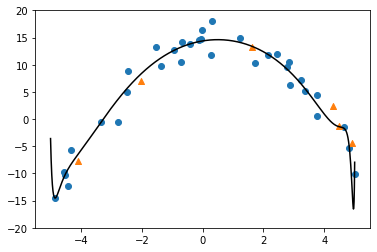

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    14.376888222645377   |
|      x      |    0.9320905478065814   |
|      x2     |    -0.941264145630948   |
|      x3     |   0.017597938905162695  |
|      x4     |  -0.012736592468114776  |
|      x5     |  -0.0008239736153095809 |
|      x6     |  4.5279075025133666e-05 |
|      x7     |  -4.678450550001076e-05 |
|      x8     |  9.744446701383767e-06  |
|      x9     | -1.0716270273924189e-06 |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [56]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [60]:
predictions = test['x', 'y']
predictions['No reg'] = model_no_reg.predict(test)
predictions['L1 reg'] = model_L1_reg.predict(test)
predictions['L2 reg'] = model_L2_reg.predict(test)

In [61]:
predictions

x,y,No reg,L1 reg,L2 reg
4.910640558017537,-4.392634892405074,-1685049.9587253183,-3.8220496372646853,-12.37347132172089
-2.036107119414016,6.966743188360572,19.478503459825788,0.41098366433775996,8.252289747043076
4.279510006523983,2.3983272579741444,-17772.27139967498,0.9762791849217277,-0.7746658854356774
1.6242336982023078,13.27547254615939,11.486026475425632,0.88981191101581,13.384969024391253
4.480333667479069,-1.2490626133387006,-61478.037442220666,0.6842459305698769,-1.3892304936533675
-4.101281947441744,-7.704140791572394,722.3389934039151,-1.7855344025368396,-6.523752402724375
